In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import pytesseract
from pytesseract import Output
import re

/home/milk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [84]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from pytesseract import Output

class ExpiryDateExtractor:
    def __init__(self, tesseract_cmd_path):
        pytesseract.pytesseract.tesseract_cmd = tesseract_cmd_path
    
    # 이미지 전처리
    def preprocess_image(self, image):
        # 색공간 변환 (BGR to Gray)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # 적응형 이진화 적용
        binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # 미디언 필터를 사용한 노이즈 제거
        denoised_image = cv2.medianBlur(binary_image, 3)

        return denoised_image

    def extract_expiry_date(self, image_path, camera_roi):
        # 이미지 로드
        image = cv2.imread(image_path)

        # 카메라 ROI 내에서 이미지 크롭
        x, y, w, h = camera_roi
        cropped_image = image[y:y+h, x:x+w]
        
        # 이미지에 카메라 ROI에 해당하는 선 그리기
        image_with_roi = cv2.rectangle(image.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)

        plt.subplot(121), plt.imshow(cv2.cvtColor(image_with_roi, cv2.COLOR_BGR2RGB)), plt.title('Original Image with ROI')
        
        # 이미지 전처리
        processed_image = self.preprocess_image(cropped_image)
        
        # 텍스트 추출
        text_data = pytesseract.image_to_data(processed_image, output_type=Output.DICT)
        
        # 추출된 텍스트 중에서 유통기한 추출
        expiry_dates = self.extract_expiry_dates_from_text(text_data)
        
        plt.subplot(122), plt.imshow(processed_image, cmap='gray'), plt.title('Preprocessed Image')
        plt.show()

        return expiry_dates

    def extract_expiry_dates_from_text(self, text_data):
        # 유통기한 추출을 위한 정규표현식 패턴
        date_pattern = r'(\d{2}|\d{4})[\./](0[1-9]|1[012])[\./](0[1-9]|[12][0-9]|3[01])'

        # 추출된 텍스트에서 유통기한 검출
        detected_dates = []
        for i in range(len(text_data['text'])):
            if int(float(text_data['conf'][i])) > 60:
                if re.match(date_pattern, text_data['text'][i]):
                    detected_dates.append(text_data['text'][i])

        return detected_dates

In [85]:
# Tesseract 실행 경로 지정
tesseract_cmd_path = r'/home/milk/anaconda3/bin/tesseract'

# ExpiryDateExtractor 객체 생성
expiry_date_extractor = ExpiryDateExtractor(tesseract_cmd_path)

In [86]:
image_path = 'image/8.jpg'

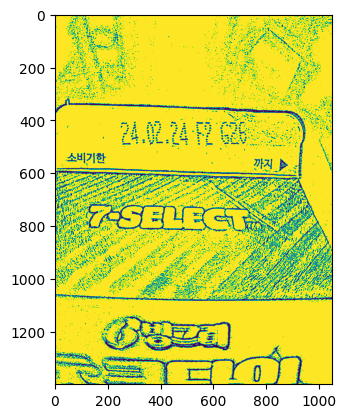

In [87]:
image = cv2.imread(image_path)
plt.imshow(expiry_date_extractor.preprocess_image(image))

In [88]:
# 카메라 ROI 좌표 (예시: x, y, width, height)
camera_roi = (200, 390, 330, 130)

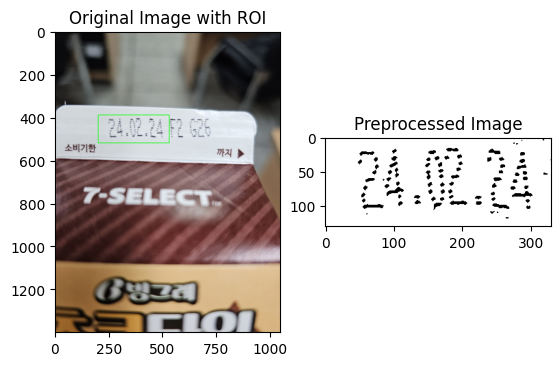

추출된 유통기한: []


In [89]:
# 유통기한 추출
expiry_dates = expiry_date_extractor.extract_expiry_date(image_path, camera_roi)

# 결과 출력
print("추출된 유통기한:", expiry_dates)